Name: Dhruvi Shah

SAP Id: 60009200025

Batch: K1

Subject: IPCV1

Lab: 3- Performing Image Enhancement(SD) Point Processing Techniques: Contrast
Stretching, Log Transformation, Power Law Transformation

Date: 27/02/23

#Aim

To Perform Image Enhancement(SD) Point Processing Techniques: Contrast Stretching, Log Transformation, Power Law Transformation

In [ ]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
path = '/content/drive/MyDrive/DJ/Sem 6/IPCV/gfg.png'

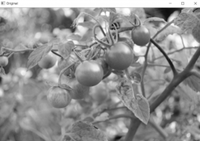

In [ ]:
img = cv.imread(path, 0)
cv2_imshow(img)

In [ ]:
import matplotlib.pyplot as plt

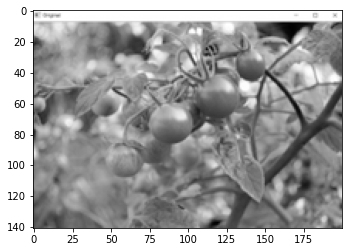

In [ ]:
plt.imshow(img, cmap = 'gray')

In [ ]:
def plotimg(*img, title):
  fig = plt.figure(figsize = (15,7))
  cols = len(img)
  for i in range(cols):
    fig.add_subplot(1, cols, i+1)
    plt.imshow(img[i], cmap = 'gray')
    plt.title(title[i])

In [ ]:
LCpath = '/content/drive/MyDrive/DJ/Sem 6/IPCV/lc.png'

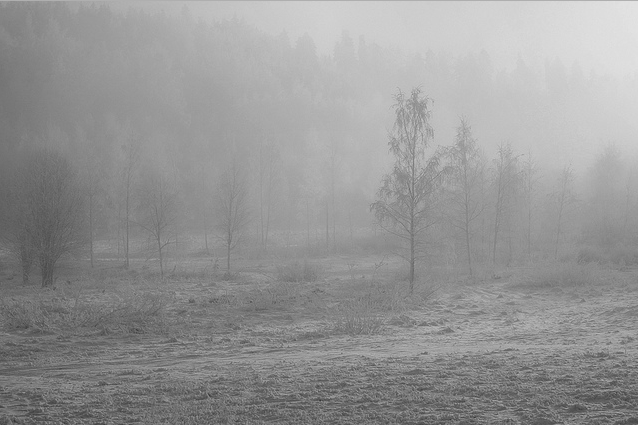

In [ ]:
lc = cv.imread(LCpath, 0)
cv2_imshow(lc)

#Contrast Stretching

In [ ]:
# def contrastStretching(img, l, m, n, a, b):
#   contrastStretchedImg = []
#   v = l*a
#   w = m *(b-a) + v
#   for row in img:
#     newRow = []
#     for r in row:
#       if 0 < r <= a:
#         newRow.append(int(l*r))
#       elif a < r <= b:
#         newRow.append(int(m*(r-a) + v))
#       else:
#         newRow.append(int(m*(r-b) + w))
  
#   return np.array(contrastStretchedImg)

In [ ]:
# cs1 = contrastStretching(lc, 0.2, 1.5, 0.6, 5, 80)

In [ ]:
# fig = plt.figure(cs1)
# cols = len(cs1)
# for i in range(cols):
#   fig.add_subplot(1, cols, i+1)
#   plt.imshow(img[i], cmap = 'gray')
#   plt.title('Contrast Stretched Image')

In [ ]:
# cv2_imshow(cs1)

In [ ]:
# plotimg(img, cs1, title = ['Original Image', 'Contrast Stretched Image'])

In [ ]:
import numpy as np
nstreched = np.zeros(lc.shape)
h1,w1 = nstreched.shape

In [ ]:
# a= 50
# b = 150
# l = 0.5
# m = 2
# n = 0.3

# v = l*a
# w = m*(b-a)+l*a

# i = 0
# j = 0

In [ ]:
def contrastStretching(img, a=50, b=150, l=0.5, m=2, n=0.3):
    rows, cols = img.shape
    v = l * a
    w = m * (b - a) + v
    ans = np.zeros((rows, cols), dtype=np.uint8)  # Initialize the ans array with zeros

    for i in range(rows):
        for j in range(cols):
            r = img[i, j]
            if 0 < r <= a:
                ans[i, j] = l * r
            elif a < r <= b:
                ans[i, j] = m * (r - a) + v
            elif b < r < 255:
                ans[i, j] = n * (r - b) + w

    return ans

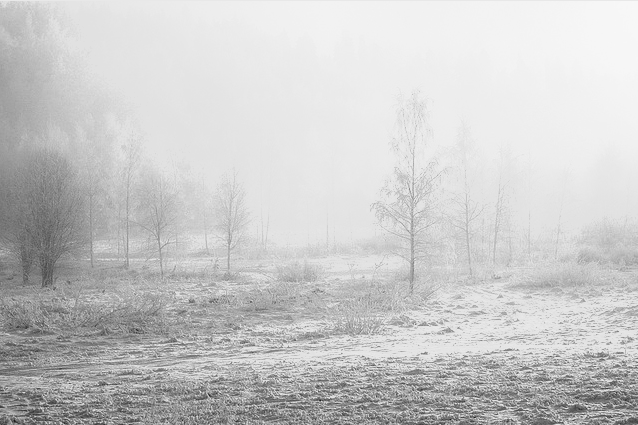

In [ ]:
stretchedImg = contrastStretching(lc)
cv2_imshow(stretchedImg)

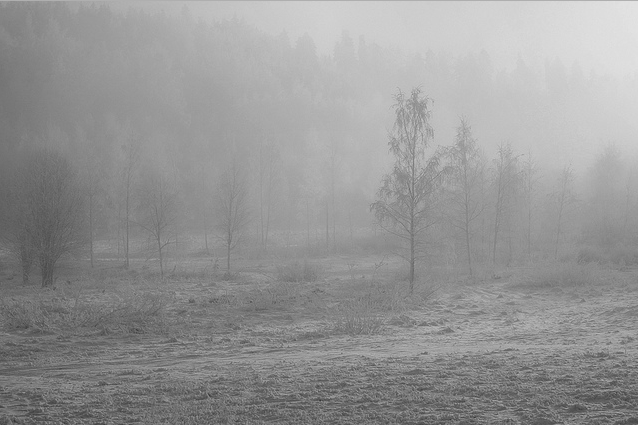

In [ ]:
cv2_imshow(lc)

#Dynamic Range Compression- Log Transformation

In [ ]:
def dynamicRange(img, c = 10):
  DRComp = np.array(c*np.log(img+1))
  plotimg(img, DRComp, title = ['Original Image', 'Dynamic Range Compressed Image '])

<ipython-input-20-2dd9857c1b29>:2: RuntimeWarning: divide by zero encountered in log
  DRComp = np.array(c*np.log(img+1))


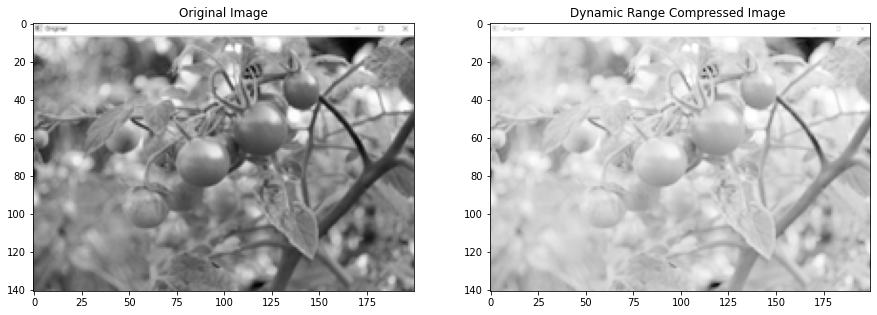

In [ ]:
dynamicRange(img)

#Power Law Transformation

In [ ]:
def powerLaw(img, gamma = 0.2, c = 1):
  powerLawImg = np.array([[int(np.floor(c* (r**gamma))) %255 for r in row] for row in img])
  plotimg(img, powerLawImg, title = ['Original Image', 'Power Law Transformed Image '])

In [ ]:
def powerLaw(img, gamma=0.2, c=1):
    powerLawImg = (c * (img ** gamma)) % 255
    return powerLawImg

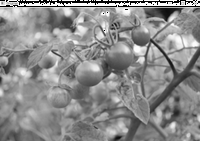

In [ ]:
PL1 = powerLaw(img,1)
cv2_imshow(PL1)

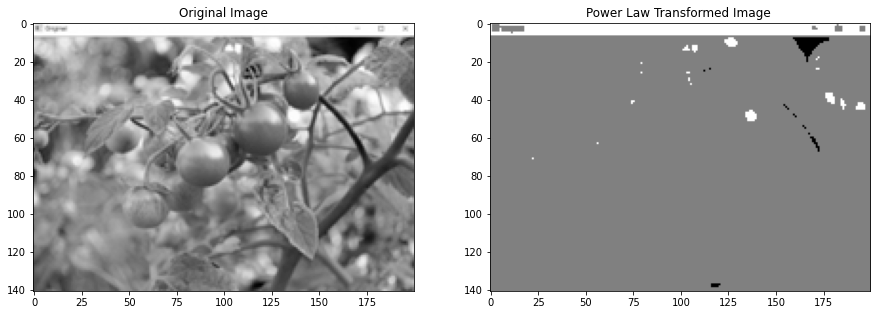

In [ ]:
powerLaw(img)

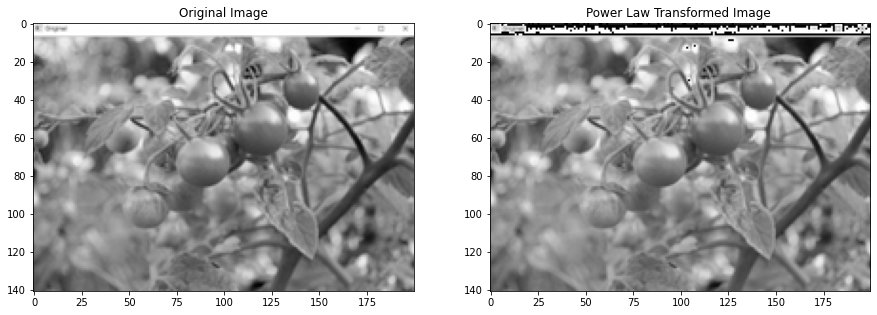

In [ ]:
powerLaw(img, 1)

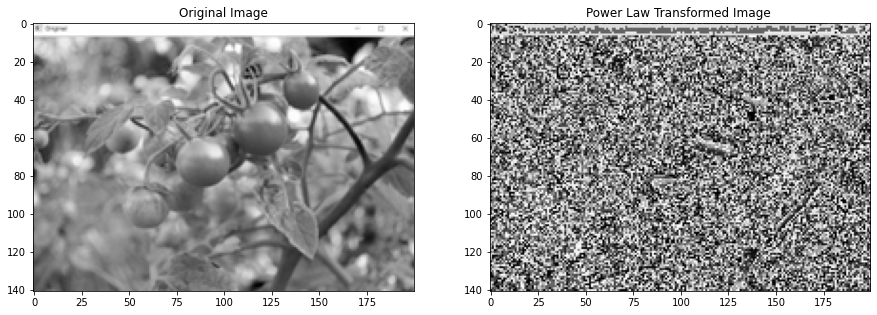

In [ ]:
powerLaw(img, 10)

#Conclusion

### Contrast Stretching
- for the dynamic range of an image to be increased: l,n < 1 and m > 1
- Contrast can be increased by making the dark portions darker and light portions lighter, thus increasing the dynamic range of the image

### Log Transformation

- s = c* log(1 + |r|)
- Used in cases where the dynamic range of the image exceeds the capacity of the display device

### Power Law Transformation

- Used to correct non linearities encountered during image capturing process
- s = c * (r ** gamma)